In [ ]:
%matplotlib inline

# 1. Getting Started with FCN Pre-trained Models

This is a quick demo of using GluonCV FCN model on PASCAL VOC dataset.
Please follow the `installation guide <../../index.html#installation>`__
to install MXNet and GluonCV if not yet.



In [1]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

## Prepare the image

download the example image



In [18]:
#url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/1.jpg'
#filename = 'example.jpg'
#gluoncv.utils.download(url, filename)

filename = "4.jpg"

load the image



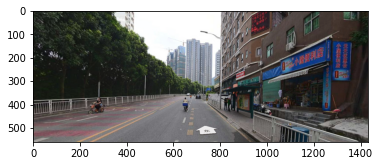

In [19]:
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

normalize the image using dataset mean



In [20]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

## Load the pre-trained model and make prediction

get pre-trained model



In [5]:
model = gluoncv.model_zoo.get_model('fcn_resnet101_voc', pretrained=True)

100121KB [00:16, 6148.91KB/s]                           
197333KB [00:33, 5886.05KB/s]                            


make prediction using single scale



In [21]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

Add color pallete for visualization



In [22]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'pascal_voc')
mask.save('output.png')

show the predicted mask



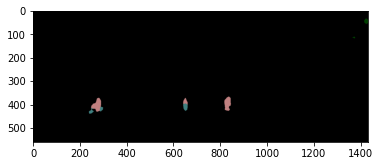

In [23]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

More Examples
 -------------

<img src="https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/4.jpg" width="45%">

<img src="https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/4.png" width="45%">

<img src="https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/5.jpg" width="45%">

<img src="https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/5.png" width="45%">

<img src="https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/6.jpg" width="45%">

<img src="https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/6.png" width="45%">

